# Pymaceuticals Inc.

## Analysis

- There is a very strong positive correlation between mouse weight and average tumor volume. The more a mouse weighs, the larger their tumor is.
- There is a nearly equal percentage of male and female mice in the study (51% male, 49% female). The study is representative of how the drug regimens affect both males and females, and therefore we can more safely assume that the results of the study will apply to both males and females outside of the study, and not only males or only females.
- Tumor growth/shrinkage is not linear throughout the experiment -- the tumor volume fluctuates between growing and shrinking throughout the timepoints. 
- There is only one outlier among the four most promising treatment regimens. This means that, among the mice that were given these treatments, there are nearly no extremes in the data.

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Read csv files
mouse_metadata = pd.read_csv("Resources/Mouse_metadata.csv")
study_results = pd.read_csv("Resources/Study_results.csv")

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Number of mice
mouse_study_df['Mouse ID'].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_all = mouse_study_df.loc[mouse_study_df['Mouse ID']=='g989', :]
duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Clean DataFrame by dropping duplicate Mouse ID
mouse_study_df = mouse_study_df.loc[mouse_study_df['Mouse ID']!='g989', :]
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Number of mice in clean DataFrame
mouse_study_df['Mouse ID'].nunique()

248

# Summary Statistics

In [11]:
# Mean of tumor volume for each drug regimen
tumor_vol_mean = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Median of tumor volume for each drug regimen
tumor_vol_med = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Variance of tumor volume for each drug regimen
tumor_vol_var = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(ddof=0)
tumor_vol_var

Drug Regimen
Capomulin    24.839296
Ceftamin     39.069446
Infubinol    42.886388
Ketapril     68.188930
Naftisol     65.817708
Placebo      60.830138
Propriva     43.555716
Ramicane     23.383692
Stelasyn     59.122106
Zoniferol    48.266689
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Standard deviation of tumor volume for each drug regimen
tumor_vol_std = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(ddof=0)
tumor_vol_std

Drug Regimen
Capomulin    4.983904
Ceftamin     6.250556
Infubinol    6.548770
Ketapril     8.257659
Naftisol     8.112811
Placebo      7.799368
Propriva     6.599675
Ramicane     4.835669
Stelasyn     7.689090
Zoniferol    6.947423
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# SEM of tumor volume for each drug regimen
tumor_vol_sem = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(ddof=0)
tumor_vol_sem

Drug Regimen
Capomulin    0.328629
Ceftamin     0.468499
Infubinol    0.490851
Ketapril     0.602252
Naftisol     0.594860
Placebo      0.579722
Propriva     0.542490
Ramicane     0.320250
Stelasyn     0.571526
Zoniferol    0.514977
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Generate a summary statistics table
summary_stats_df = pd.DataFrame({
    "Mean":tumor_vol_mean,
    "Median":tumor_vol_med,
    "Variance":tumor_vol_var,
    "Standard Deviation":tumor_vol_std,
    "SEM":tumor_vol_sem
})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [17]:
# Generate a summary statistics table using the aggregation method
summary_stats_agg = mouse_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": \
                                                                ['mean','median','var','std','sem']})

summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [18]:
drug_count = mouse_study_df["Drug Regimen"].value_counts()
drug_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

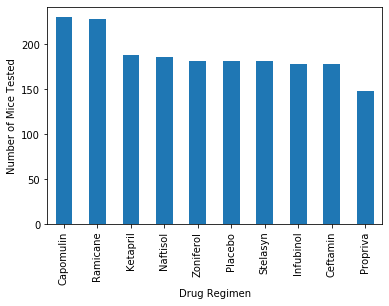

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
fig1 = drug_count.plot(kind="bar")
fig1.set_xlabel("Drug Regimen")
fig1.set_ylabel("Number of Mice Tested")
plt.show()

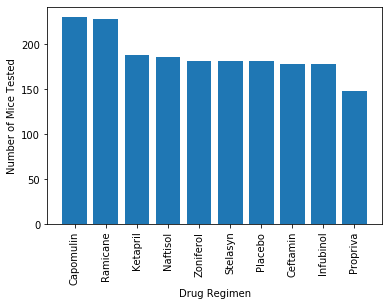

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
x_axis = np.arange(len(mouse_study_df['Drug Regimen'].value_counts()))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_count)
plt.xticks(tick_locations, labels=["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo",\
                                   "Ceftamin","Infubinol","Propriva"], rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

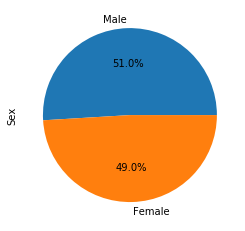

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_df["Sex"].value_counts()[["Male", "Female"]].plot(kind="pie", y="Sex", autopct="%1.1f%%")
plt.show()

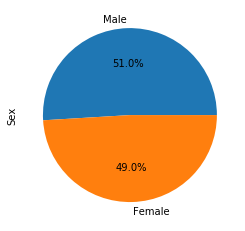

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

sizes = [mouse_study_df["Sex"].value_counts()["Male"], mouse_study_df["Sex"].value_counts()["Female"]]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers, and Boxplots

In [23]:
# Greatest timepoint for each mouse
mouse_study_grp = pd.DataFrame(mouse_study_df.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].max())

# Merge this grouped Dataframe with the original Dataframe
mouse_study_merged = pd.merge(mouse_study_grp, mouse_study_df, how='left', on=['Timepoint', 'Mouse ID', \
                                                                               'Drug Regimen'])
mouse_study_merged

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,10,z435,Propriva,Female,12,26,48.710661,0
244,45,z578,Ramicane,Male,11,16,30.638696,0
245,45,z581,Infubinol,Female,24,25,62.754451,3
246,45,z795,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put treatments into a list for the for loop (and later for plot labels)
treatment_names = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment_names:
    tumor = mouse_study_merged.loc[mouse_study_merged['Drug Regimen'] == name, "Tumor Volume (mm3)"]
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(f"{name}'s potential outliers: {outliers}")
    tumor_vol_data.append(tumor)
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


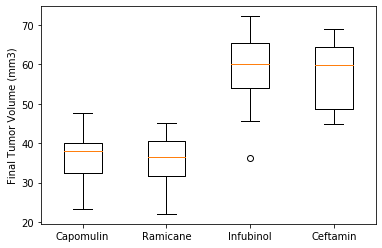

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(treatment_names)
plt.show()

# Line and Scatter Plots

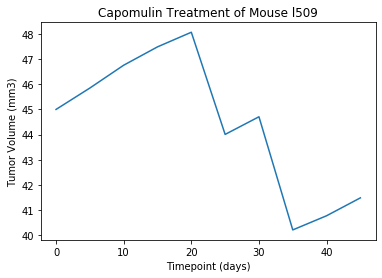

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (l509)

l509 = mouse_study_df.loc[mouse_study_df['Mouse ID'] == "l509"]

x_axis = l509["Timepoint"]
y_axis = l509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

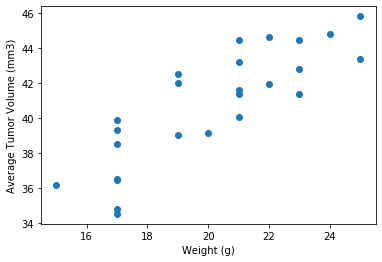

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Capomulin"]
x_axis = cap_df.groupby("Mouse ID")["Weight (g)"].mean()
data = cap_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()


plt.scatter(x_axis, data)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


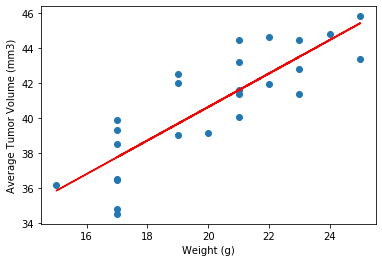

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
correlation = st.pearsonr(x_axis, data)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

weight_slope, weight_int, weight_r, weight_p, weight_se = st.linregress(x_axis, data)

weight_fit = weight_slope * x_axis + weight_int

plt.scatter(x_axis, data)
plt.plot(x_axis, weight_fit, '-', color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()